In [51]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Read file 


In [29]:
filename = [f for f in os.listdir() if f.endswith('.csv')]
X_test, X_train, y_test, y_train = pd.read_csv(filename[0]), pd.read_csv(filename[1]), pd.read_csv(filename[2]), pd.read_csv(filename[3])


## Data Distribution

C:\Users\Tim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


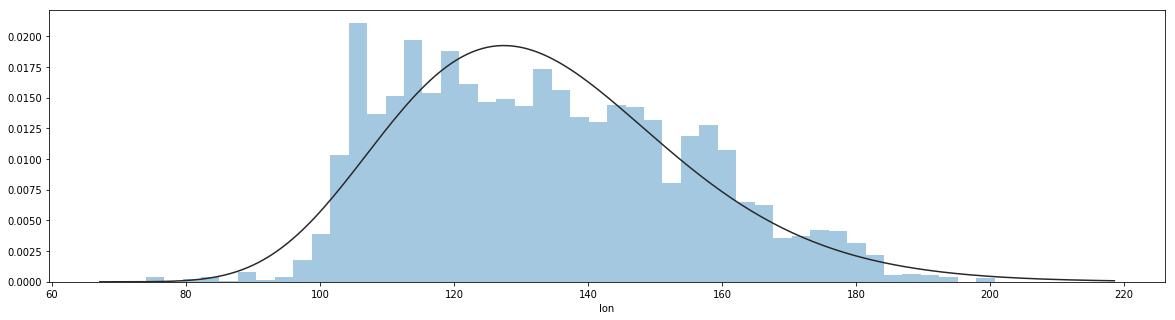

In [40]:
plt.figure(figsize=(20,5))
sns.distplot(X_train['lon'], kde=False, fit=stats.gamma, hist=True)

C:\Users\Tim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


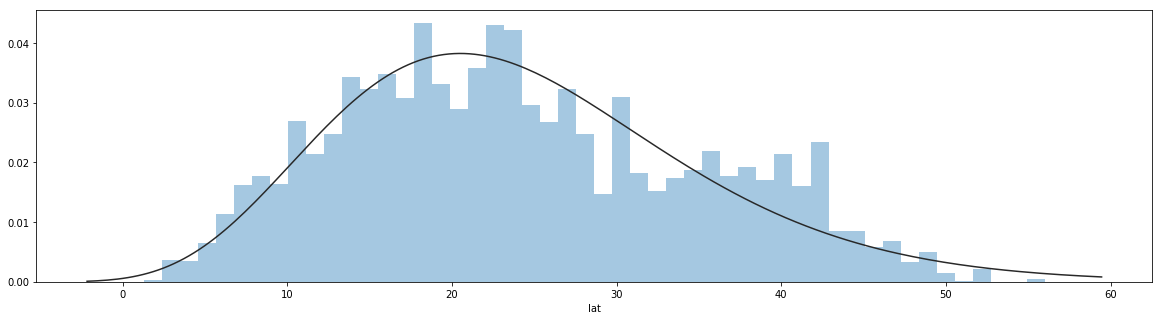

In [41]:
plt.figure(figsize=(20,5))
sns.distplot(X_train['lat'], kde=False, fit=stats.gamma, hist=True)

C:\Users\Tim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


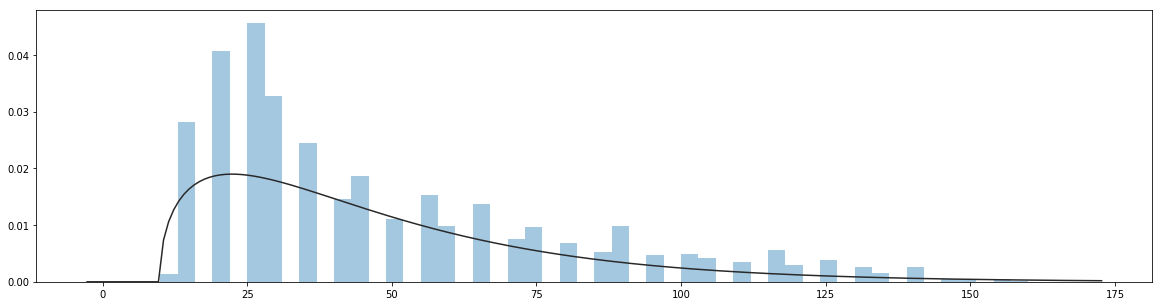

In [48]:
plt.figure(figsize=(20,5))
sns.distplot(X_train.loc[X_train['Intensity']!=0,['Intensity']], kde=False, fit=stats.gamma, hist=True)

## Preprocess

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
inverted_X = scaler.inverse_transform(scaled_X_train)

scaled_X_test = scaler.transform(X_test)
inverted_X_test = scaler.transform(scaled_X_test)

scaled_y_train = scaler.transform(y_train)
inverted_y = scaler.inverse_transform(scaled_y_train)

scaled_y_test = scaler.transform(y_test)
inverted_y_test = scaler.transform(scaled_y_test)

In [128]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.models import load_model
%matplotlib inline

Using TensorFlow backend.


## Build Model

In [340]:
def fit_lstm(train, target, batch_size, nb_epoch, neurons):
    X, y = train[:,:], target[:,:]
    X = train.reshape(train.shape[0], 1, train.shape[1])
    
    
    RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, decay=0.0, clipvalue=0.1)
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(3))
    model.compile(loss='mse', optimizer=RMSprop, metrics=['acc'])
    es = EarlyStopping(monitor='val_loss', patience=5)
    for i in range(0, X.shape[0], 105):
        model.fit(X, y, epochs=1000, batch_size=batch_size, verbose=1, shuffle=False,validation_split=0.2,callbacks=[es])
        model.reset_states()
    model.save('lstm_RMSprop.h5')
    
    return model


In [341]:
fit_lstm(scaled_X_train, scaled_y_train, 1, 1000, 128)

Train on 57204 samples, validate on 14301 samples
Epoch 1/1
57204/57204 [==============================] - 136s 2ms/step - loss: 0.5752 - acc: 0.5948 - val_loss: 0.6044 - val_acc: 0.5897
Train on 57204 samples, validate on 14301 samples
Epoch 1/1
57204/57204 [==============================] - 140s 2ms/step - loss: 0.5632 - acc: 0.6163 - val_loss: 0.6014 - val_acc: 0.5806
Train on 57204 samples, validate on 14301 samples
Epoch 1/1
57204/57204 [==============================] - 130s 2ms/step - loss: 0.5643 - acc: 0.6146 - val_loss: 0.6029 - val_acc: 0.5713
Train on 57204 samples, validate on 14301 samples
Epoch 1/1
57204/57204 [==============================] - 129s 2ms/step - loss: 0.5641 - acc: 0.6148 - val_loss: 0.6021 - val_acc: 0.5724
Train on 57204 samples, validate on 14301 samples
Epoch 1/1
57204/57204 [==============================] - 141s 2ms/step - loss: 0.5633 - acc: 0.6147 - val_loss: 0.6002 - val_acc: 0.5737
Train on 57204 samples, validate on 14301 samples
Epoch 1/1
57204

KeyboardInterrupt: 

In [124]:
model = load_model('lstm_RMSprop.h5')
train_reshaped = scaled_X.reshape(1800, 1, 11)
a = model.predict(train_reshaped, batch_size=1)
inversed_X = scaler.inverse_transform(a)

NameError: name 'load_model' is not defined